<a href="https://colab.research.google.com/github/jcmachicaocuf/CUF__NLP_LLM/blob/main/cuf_nlp_wk01___NLP_basico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### NLP LLM Workshop
# Intro to NLP (Traditional)

* Tokenization, stopword removal, stemming, lemmatization
* Code: Write a script that takes a text input and preprocesses it step-by-step.
* Word Frequency Analysis
* Compute word frequencies in a text corpus.
* Code: Create a word cloud or bar chart showing top-n frequent words.
* Named Entity Recognition (NER)
* Highlight named entities in a given text.
* Code: Use spaCy’s pre-trained models to extract and label entities in text.

In [1]:
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [9]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# prompt: how would i load nlp for spanish
!python -m spacy download es_core_news_sm
nlp_es = spacy.load("es_core_news_sm")
# Note: You should restart kernel if you want to use nlp_es

In [14]:
def preprocess_text(text):
    # Tokenization
    tokens = nltk.word_tokenize(text.lower())  # Convert to lowercase

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words and token.isalnum()]
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]

    return lemmatized_tokens

In [15]:
def word_frequency_analysis(text, n=10):
  tokens = preprocess_text(text)
  word_counts = Counter(tokens)
  top_n_words = word_counts.most_common(n)

  # Word cloud
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.title("Word Cloud")
  plt.show()

  # Bar Chart
  words, counts = zip(*top_n_words)
  plt.figure(figsize=(10, 5))
  plt.bar(words, counts)
  plt.xlabel("Words")
  plt.ylabel("Frequency")
  plt.title(f"Top {n} Frequent Words")
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
  plt.tight_layout() # Adjust layout to prevent labels from overlapping
  plt.show()

  return top_n_words

In [16]:
def named_entity_recognition(text):
    doc = nlp(text)
    entities = []
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))
    return entities

In [18]:
def ner_es(texto):
    doc = nlp_es(texto)
    entities = []
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))
    return entities

In [7]:
sample_text = """
The quick brown fox jumps over the lazy dog. This is an example sentence. Apple Inc. is a technology company headquartered in Cupertino, California.
"""

In [21]:
texto_muestra = '''
Hay una revuelta en la esquina del barrio La Recoleta, en Buenos Aires, justo dando la vuelta a la pista que \
conduce al bosque. No hay vuelta atrás en la transformación de la actitud de la gente, escribió el célebre Ernesto Sábato, \
respecto a la revuelta en defensa de los bosques.
'''

In [10]:
preprocessed_tokens = preprocess_text(sample_text)
print("Preprocessed Tokens:", preprocessed_tokens)

Preprocessed Tokens: ['quick', 'brown', 'fox', 'jump', 'lazi', 'dog', 'exampl', 'sentenc', 'appl', 'technolog', 'compani', 'headquart', 'cupertino', 'california']


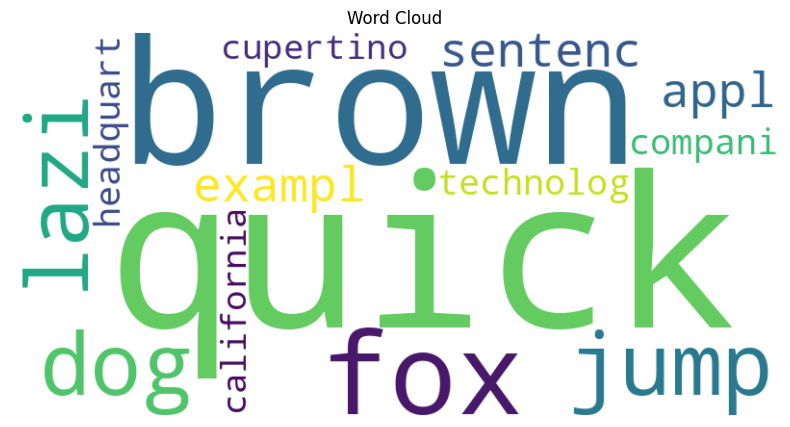

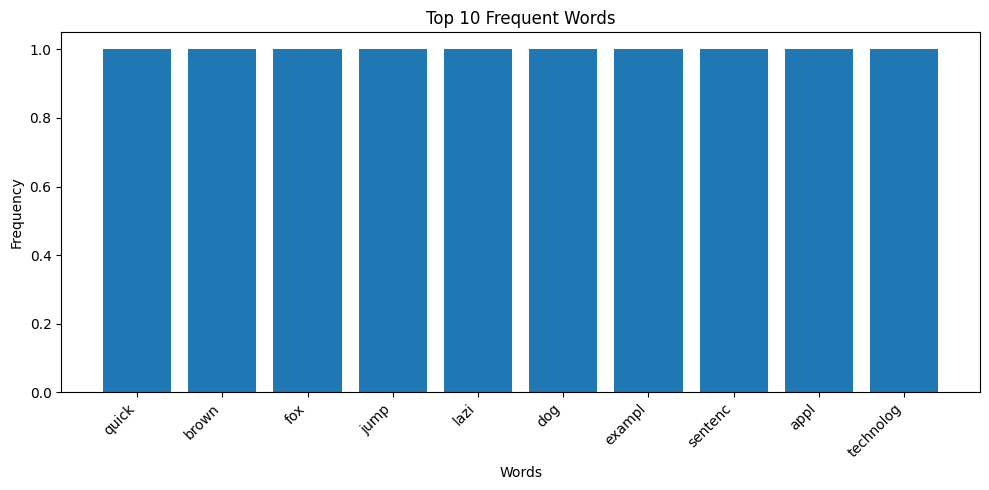


Top Words: [('quick', 1), ('brown', 1), ('fox', 1), ('jump', 1), ('lazi', 1), ('dog', 1), ('exampl', 1), ('sentenc', 1), ('appl', 1), ('technolog', 1)]


In [11]:
top_words = word_frequency_analysis(sample_text)
print("\nTop Words:", top_words)

In [12]:
entities = named_entity_recognition(sample_text)
print("\nNamed Entities:", entities)


Named Entities: [('Apple Inc.', 'ORG'), ('Cupertino', 'GPE'), ('California', 'GPE')]


In [22]:
entidades = ner_es(texto_muestra)
print("\nNamed Entities:", entidades)


Named Entities: [('La Recoleta', 'LOC'), ('Buenos Aires', 'LOC'), ('No hay vuelta atrás', 'MISC'), ('Ernesto Sábato', 'PER')]
